In [4]:
from astropy.coordinates import SkyCoord
from astropy import units as u

# Ta część nie ma dużego znaczenia - kod bierze współrzędne gwiazdy i zmienia je na
# uniwersalne galaktyczne współrzędne
# zostawiam tyko dlatego że być może później się przyda
# Define star's RA and Dec in degrees
star_coord = SkyCoord(ra=14.660*u.deg, dec=-60.835*u.deg, frame='icrs')

# Print RA and Dec
print("RA:", star_coord.ra)
print("Dec:", star_coord.dec)

# Convert to Galactic coordinates
galactic_coord = star_coord.galactic
print("Galactic Longitude:", galactic_coord.l)
print("Galactic Latitude:", galactic_coord.b)


RA: 14d39m36s
Dec: -60d50m06s
Galactic Longitude: 301d21m06.33004189s
Galactic Latitude: -56d16m16.14010455s


In [6]:
# Let's say we want to find all the stars within a 1-degree radius of OGLE-TR-10e.

from astroquery.gaia import Gaia
from astropy.coordinates import SkyCoord
import numpy as np
import astropy.units as u

# Define the position of Betelgeuse (Alpha Orionis)
exoplanet_coord = SkyCoord(ra=267.867748*u.deg, dec=-29.876476*u.deg, frame='icrs')

# Define the search radius (1 degree)
radius = 1 * u.deg

# Perform the cone search
job = Gaia.cone_search_async(exoplanet_coord, radius=radius)
# job = Gaia.cone_search_async(betelgeuse_coord, radius=radius)
results = job.get_results()
# Filter out rows with missing or NaN values in the 'phot_g_mean_mag' column
valid_results = results[~np.isnan(results['phot_g_mean_mag'])]
valid_results['phot_g_mean_mag']
valid_results.sort('phot_g_mean_mag')  # Sort by brightness (magnitude)

brightest_ten = valid_results[:10]
brightest_ten


INFO: Query finished. [astroquery.utils.tap.core]


solution_id,DESIGNATION,SOURCE_ID,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_method_used,rv_nb_transits,rv_nb_deblended_transits,rv_visibility_periods_used,rv_expected_sig_to_noise,rv_renormalised_gof,rv_chisq_pvalue,rv_time_duration,rv_amplitude_robust,rv_template_teff,rv_template_logg,rv_template_fe_h,rv_atm_param_origin,vbroad,vbroad_error,vbroad_nb_transits,grvs_mag,grvs_mag_error,grvs_mag_nb_transits,rvs_spec_sig_to_noise,phot_variable_flag,l,b,ecl_lon,ecl_lat,in_qso_candidates,in_galaxy_candidates,non_single_star,has_xp_continuous,has_xp_sampled,has_rvs,has_epoch_photometry,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,in_andromeda_survey,classprob_dsc_combmod_quasar,classprob_dsc_combmod_galaxy,classprob_dsc_combmod_star,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot,dist
,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / um,1 / um,1 / um,,,,,,,,mas,,,,,deg,,,,,,,,deg,deg,deg,deg,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,,,,,mag,mag,mag,km / s,km / s,,,,,,,,d,km / s,K,log(cm.s**-2),dex,,km / s,km / s,,mag,mag,,,,deg,deg,deg,deg,,,,,,,,,,,,,,,K,K,K,log(cm.s**-2),log(cm.s**-2),log(cm.s**-2),dex,dex,dex,pc,pc,pc,mag,mag,mag,mag,mag,mag,mag,mag,mag,,
int64,object,int64,int64,float64,float64,float32,float64,float32,float64,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,float32,float32,float32,float32,int16,bool,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,float32,int16,int16,int16,float32,float32,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,float32,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,fl

In [10]:
# len(results)
# dir(valid_results)
brightest_ten['ra', 'dec', 'distance_gspphot', 'parallax']

ra,dec,distance_gspphot,parallax
deg,deg,pc,mas
float64,float64,float32,float64
267.86774836312435,-29.87647654704596,968.4252,0.8015794067379126
267.8650630213499,-29.878635846227574,4067.52,0.2146248142181746
267.8660634969962,-29.8754210639409,--,-1.2176261451061892
267.86634593166565,-29.87526698944431,--,--
267.86982340118897,-29.874983678356426,--,0.10917233570146155
267.8699961766004,-29.878544453151477,--,0.304588856110901
267.86772738542237,-29.87470127368364,661.2293,0.2771377908176741
267.8708957807912,-29.87694387290846,--,--


In [12]:
df = brightest_ten['SOURCE_ID', 'ra', 'dec', 'distance_gspphot', 'parallax'].to_pandas()
df.to_csv('brightest_stars.csv')

In [ ]:
# spróbujmy z tej tabeli pobrać współrzędne kilku gwiazd i narysować je na wykresie 3d
# z tej tabeli potrzebuję kolumn ra, dec, distance
# wezmę gwiazdę o indeksie 1, bo ma potrzebne info
import matplotlib.pyplot as plt

from plot_stars_3d import plot_brightest_stars_3d
from spherical_to_cartesian import calculate_distance_from_parallax, spherical_to_cartesian

ra = brightest_ten['ra']
dec = brightest_ten['dec']
parallax = brightest_ten['parallax']


plot_brightest_stars_3d(ra, dec, parallax)


In [ ]:
ra1, ra2 = brightest_ten[1:3]['ra']
dec1, dec2 = brightest_ten[1:3]['dec']
parallax1, parallax2 = brightest_ten[1:3]['parallax']
dist1 = calculate_distance_from_parallax(parallax1)
dist2 = calculate_distance_from_parallax(parallax2)

# Convert to Cartesian coordinates
x1, y1, z1 = spherical_to_cartesian(ra1, dec1, dist1)
x2, y2, z2 = spherical_to_cartesian(ra2, dec2, dist2)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the stars
ax.scatter([x1, x2], [y1, y2], [z1, z2], color=['red', 'blue'], s=100, label=['Star1', 'Star2'])

# Labeling the stars
ax.text(x1, y1, z1, 'Star1', color='red')
ax.text(x2, y2, z2, 'Star2', color='blue')

# Labels and title
ax.set_xlabel('X (pc)')
ax.set_ylabel('Y (pc)')
ax.set_zlabel('Z (pc)')
ax.set_title('3D Position of Stars')


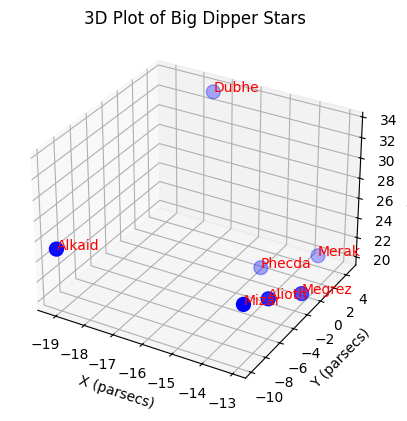

In [3]:
import matplotlib.pyplot as plt

from spherical_to_cartesian import calculate_distance_from_parallax, spherical_to_cartesian

# Big Dipper stars with their RA (degrees), Dec (degrees), and Distance (parsecs)
stars = {
    'Alkaid': [206.8850, 49.3133, 33],
    'Mizar': [200.9814, 54.9254, 26],
    'Alioth': [193.5073, 55.9598, 25],
    'Megrez': [183.8568, 57.0326, 24],
    'Phecda': [177.2646, 53.6948, 25],
    'Dubhe': [165.4600, 61.7508, 38],
    'Merak': [165.9322, 56.3824, 25]
}

# Convert RA, Dec, Distance to Cartesian coordinates
cartesian_coords = {star: spherical_to_cartesian(ra, dec, distance) for star, (ra, dec, distance) in stars.items()}

# Extract coordinates for plotting
x_coords = [cartesian_coords[star][0] for star in cartesian_coords]
y_coords = [cartesian_coords[star][1] for star in cartesian_coords]
z_coords = [cartesian_coords[star][2] for star in cartesian_coords]

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot stars
ax.scatter(x_coords, y_coords, z_coords, color='blue', s=100)

# Annotate stars with their names
for star, (x, y, z) in cartesian_coords.items():
    ax.text(x, y, z, star, fontsize=10, color='red')

# Labels
ax.set_xlabel('X (parsecs)')
ax.set_ylabel('Y (parsecs)')
ax.set_zlabel('Z (parsecs)')

# Title
ax.set_title('3D Plot of Big Dipper Stars')

plt.show()